In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Input the dataset

In [2]:
sms = pd.read_csv("datasets_483_982_spam.csv", encoding="latin-1")
sms.dropna(how="any", inplace=True, axis=1)
sms.columns = ['label', 'message']
sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Exploratory Data Analysis.

In [3]:
sms.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [4]:
sms.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [5]:
# adding another label for the spam or ham category
sms['label_number'] = sms.label.map({'spam':0, 'ham':1})
sms.head()

,label,message,label_number
0,ham,"Go until jurong point, crazy.. Available only ...",1
1,ham,Ok lar... Joking wif u oni...,1
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0
3,ham,U dun say so early hor... U c already then say...,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",1


In [8]:
sms['message_len'] = sms.message.apply(len)
sms.head()

,label,message,label_number,message_len
0,ham,"Go until jurong point, crazy.. Available only ...",1,111
1,ham,Ok lar... Joking wif u oni...,1,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0,155
3,ham,U dun say so early hor... U c already then say...,1,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",1,61


Text(0.5, 1.0, 'Message Length comparison')

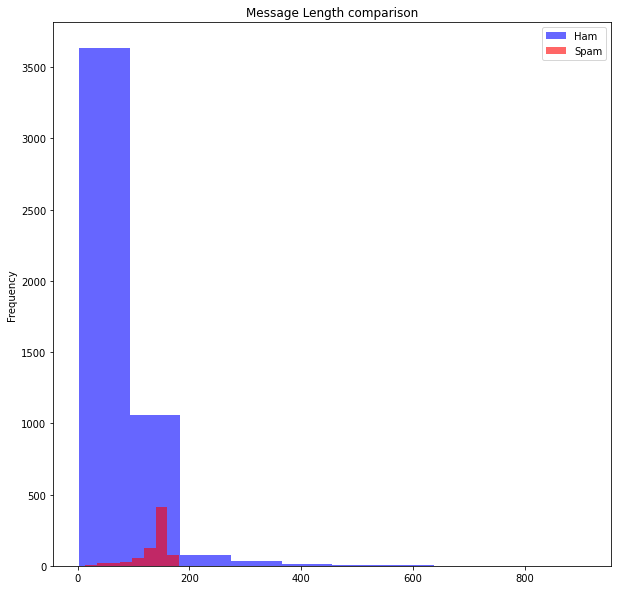

In [20]:
#plotting the message lengths to compare the labels
plt.figure(figsize=(10, 10))
sms[sms.label == "ham"].message_len.plot(kind = "hist", color="blue", label="Ham", alpha=0.6)
sms[sms.label == "spam"].message_len.plot(kind = "hist", color="red", label="Spam", alpha=0.6)

plt.legend()
plt.title("Message Length comparison")

We can see that length of messages in spam is considerably smaller than ham.

In [21]:
sms[sms.label == "ham"].describe()

,label_number,message_len
count,4825.0,4825.000000
mean,1.0,71.023627
std,0.0,58.016023
min,1.0,2.000000
25%,1.0,33.000000
50%,1.0,52.000000
75%,1.0,92.000000
max,1.0,910.000000


In [22]:
sms[sms.label == "spam"].describe()

,label_number,message_len
count,747.0,747.000000
mean,0.0,138.866131
std,0.0,29.183082
min,0.0,13.000000
25%,0.0,132.500000
50%,0.0,149.000000
75%,0.0,157.000000
max,0.0,224.000000


### Text Pre-Processing

In [32]:
import string
from nltk.corpus import stopwords
def text(mess):
    STOPWORDS = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])

Now let's "tokenize" these messages. Tokenization is just the term used to describe the process of converting the normal text strings in to a list of tokens (words that we actually want).

In [34]:
sms['clean_msg'] = sms.message.apply(text)

In [35]:
sms.head()

,label,message,label_number,message_len,clean_msg
0,ham,"Go until jurong point, crazy.. Available only ...",1,111,Go jurong point crazy Available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,1,29,Ok lar Joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0,155,Free entry wkly comp win FA Cup final tkts 21s...
3,ham,U dun say so early hor... U c already then say...,1,49,dun say early hor c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",1,61,Nah think goes usf lives around though


In [39]:
from collections import Counter
words = sms[sms.label=='ham'].clean_msg.apply(lambda x: [word.lower() for word in x.split()])
count_ham = Counter()
for msg in words:
    count_ham.update(msg)
    
print(count_ham.most_common(50))

[('get', 303), ('ltgt', 276), ('ok', 272), ('go', 247), ('ill', 236), ('know', 232), ('got', 231), ('like', 229), ('call', 229), ('come', 224), ('good', 222), ('time', 189), ('day', 187), ('love', 185), ('going', 167), ('want', 163), ('one', 162), ('home', 160), ('lor', 160), ('need', 156), ('sorry', 153), ('still', 146), ('see', 137), ('n', 134), ('later', 134), ('da', 131), ('r', 131), ('back', 129), ('think', 128), ('well', 126), ('today', 125), ('send', 123), ('tell', 121), ('cant', 118), ('ì', 117), ('hi', 117), ('take', 112), ('much', 112), ('oh', 111), ('night', 107), ('hey', 106), ('happy', 105), ('great', 100), ('way', 100), ('hope', 99), ('pls', 98), ('work', 96), ('wat', 95), ('thats', 94), ('dear', 94)]


In [40]:
words = sms[sms.label=='spam'].clean_msg.apply(lambda x: [word.lower() for word in x.split()])
count_spam = Counter()
for msg in words:
    count_spam.update(msg)
    
print(count_spam.most_common(50))

[('call', 347), ('free', 216), ('txt', 150), ('mobile', 123), ('text', 120), ('claim', 113), ('stop', 113), ('reply', 101), ('prize', 92), ('get', 83), ('new', 69), ('send', 67), ('nokia', 65), ('urgent', 63), ('cash', 62), ('win', 60), ('contact', 56), ('service', 55), ('please', 52), ('guaranteed', 50), ('customer', 49), ('16', 49), ('week', 49), ('tone', 48), ('per', 46), ('phone', 45), ('18', 43), ('chat', 42), ('awarded', 38), ('draw', 38), ('latest', 36), ('å£1000', 35), ('line', 35), ('150ppm', 34), ('mins', 34), ('receive', 33), ('camera', 33), ('1', 33), ('every', 33), ('message', 32), ('holiday', 32), ('landline', 32), ('shows', 31), ('å£2000', 31), ('go', 31), ('box', 30), ('number', 30), ('apply', 29), ('code', 29), ('live', 29)]
